## Model Training
Train machine learning models to predict employee performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [4]:
df = pd.read_csv('../data/processed/processed_data.csv')

In [10]:
X = df.drop('PerformanceRating', axis=1)
y = df['PerformanceRating']

### Step 1: Split Data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Training Data:', X_train.shape, 'Testing Data:', X_test.shape)

Training Data: (840, 1252) Testing Data: (360, 1252)


### Step 2: Train Random Forest Model

In [12]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
print('Model Training Completed')

Model Training Completed


### Step 3: Predictions & Metrics

In [13]:
preds = model.predict(X_test)
r2 = r2_score(y_test, preds)
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))

In [14]:
print(f'R2 Score: {r2:.3f}')
print(f'MAE: {mae:.3f}')
print(f'RMSE: {rmse:.3f}')

R2 Score: 0.688
MAE: 0.105
RMSE: 0.282


### Step 4: Feature Importance

In [15]:
feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feat_imp.sort_values(by='Importance', ascending=False, inplace=True)
feat_imp.to_csv('../data/processed/feature_importance.csv', index=False)
print('Feature importance saved.')

Feature importance saved.


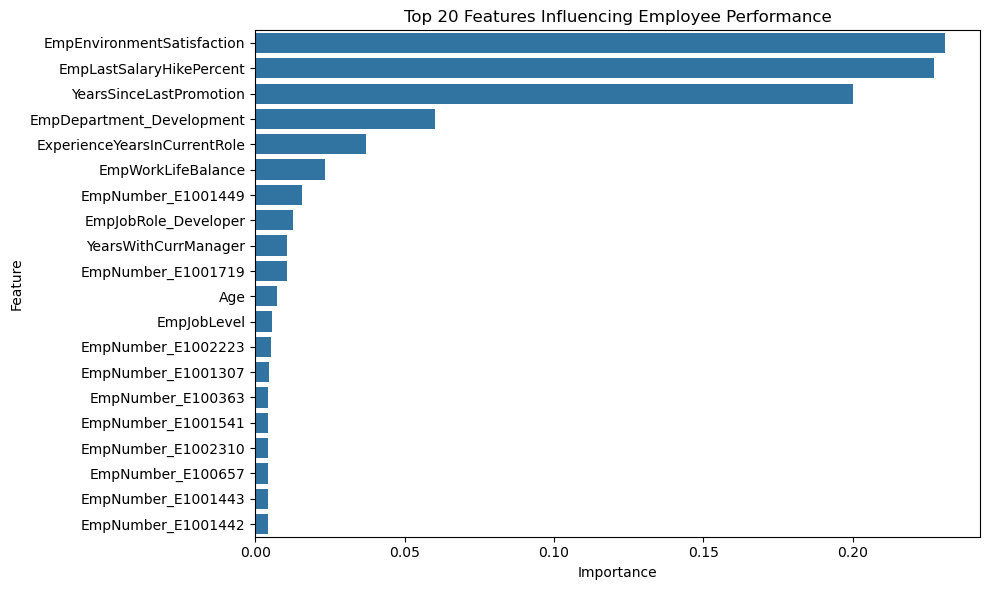

In [19]:
top_features = feat_imp.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top 20 Features Influencing Employee Performance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()